In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


<h1>Formating Data</h1>

In [235]:
df = pd.read_csv("Patrick_training_validation_set.csv")

In [236]:
df.head(5)

,dr7objid_1,simple_class,P_S0,P_edge_on,P_bar_Nair10,P_merg,P_bulge,ID,RA_1,Dec_1,PhotoFlag,FWHM,r_petro,er_petro
0,587730845812196092,S,0.980073,1.365571e-06,0.518699,0.497976,0.064086,SPLUS.STRIPE82-0101.10970.griz,309.6756,-1.2181,2,6.41,15.90,0.02
1,587730845812982517,SB,0.908754,1.386264e-07,0.447314,0.200284,0.951986,SPLUS.STRIPE82-0103.13920.griz,311.4581,-1.1644,2,5.56,16.16,0.02
2,587730845813243927,S,0.930493,3.341422e-04,0.736242,0.440820,0.031489,SPLUS.STRIPE82-0103.11466.griz,312.0403,-1.2119,2,3.79,15.52,0.02
3,587730845813244869,Er,0.114102,3.513018e-01,0.061133,0.053804,0.990206,SPLUS.STRIPE82-0103.15392.griz,312.1211,-1.1323,2,4.28,16.77,0.02
4,587730845813244944,S,0.988128,4.014963e-01,0.457791,0.330930,0.000824,SPLUS.STRIPE82-0103.10373.griz,312.1473,-1.2246,2,12.81,16.93,0.02


In [237]:
df.describe()

,dr7objid_1,P_S0,P_edge_on,P_bar_Nair10,P_merg,P_bulge,RA_1,Dec_1,PhotoFlag,FWHM,r_petro,er_petro
count,8.161000e+03,8161.000000,8.161000e+03,8.161000e+03,8161.000000,8.161000e+03,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000
mean,5.878282e+17,0.711384,2.158983e-01,2.646300e-01,0.246376,5.365112e-01,150.183975,-0.011222,1.330964,8.723980,16.225124,0.020191
std,1.345144e+14,0.309589,3.211881e-01,1.845875e-01,0.292179,4.050394e-01,152.842890,0.721830,1.384484,17.973339,0.781928,0.001653
min,5.877308e+17,0.032350,2.159374e-13,1.001660e-12,0.000464,7.363940e-08,0.006500,-1.229800,0.000000,2.470000,6.660000,0.020000
25%,5.877312e+17,0.479578,1.103321e-03,1.158367e-01,0.051848,5.994169e-02,19.098400,-0.640600,0.000000,4.290000,15.920000,0.020000
50%,5.877315e+17,0.857111,3.702521e-02,2.570614e-01,0.107971,6.448643e-01,44.288800,-0.028800,2.000000,5.600000,16.460000,0.020000
75%,5.880155e+17,0.971287,3.135478e-01,3.675140e-01,0.313953,9.501289e-01,329.369700,0.610200,2.000000,9.070000,16.770000,0.020000
max,5.880155e+17,0.999898,9.999996e-01,9.941334e-01,1.000000,1.000000e+00,359.988800,1.258700,19.000000,688.450000,16.990000,0.060000


In [238]:
df["simple_class"].unique()

array(['S', 'SB', 'Er', 'Se', 'Ei', 'Ec', 'A'], dtype=object)

In [239]:
df = df.sort_values("ID")
print(df.shape)
df.head(5)

(8161, 14)


,dr7objid_1,simple_class,P_S0,P_edge_on,P_bar_Nair10,P_merg,P_bulge,ID,RA_1,Dec_1,PhotoFlag,FWHM,r_petro,er_petro
5446,588015507658768529,Ec,0.992788,0.991921,0.311965,0.418576,0.974106,SPLUS.STRIPE82-0001.03217.griz,359.9707,-1.2178,2,7.89,16.50,0.03
5448,588015507658833996,SB,0.610342,0.001808,0.414245,0.108942,0.757017,SPLUS.STRIPE82-0001.03462.griz,0.1286,-1.2130,3,4.75,15.80,0.02
5445,588015507658768490,SB,0.997540,0.001146,0.529711,0.999761,0.098503,SPLUS.STRIPE82-0001.03521.griz,0.0559,-1.2136,2,14.99,16.34,0.02
5450,588015507658834049,Er,0.592436,0.040049,0.234143,0.032117,0.937357,SPLUS.STRIPE82-0001.03897.griz,0.2156,-1.1983,2,4.79,16.77,0.02
5449,588015507658834026,Ei,0.997986,0.098651,0.188016,0.041046,0.062332,SPLUS.STRIPE82-0001.04092.griz,0.1664,-1.1912,0,7.85,16.88,0.02


In [240]:
df = df.drop(df[df["simple_class"] == "A"].index, axis=0)
df.shape

(8157, 14)

In [241]:
df["simple_class"].unique()

array(['Ec', 'SB', 'Er', 'Ei', 'S', 'Se'], dtype=object)

In [250]:
classes = np.zeros((df.shape[0], 7), dtype="float32")
classes[:,:-2] = df[["P_S0", "P_edge_on", "P_bar_Nair10", "P_merg", "P_bulge"]]
classes[:5]

array([[0.992788  , 0.9919212 , 0.3119653 , 0.41857558, 0.9741057 ,
        0.        , 0.        ],
       [0.61034167, 0.00180763, 0.4142451 , 0.10894234, 0.75701725,
        0.        , 0.        ],
       [0.99754   , 0.00114628, 0.52971137, 0.9997614 , 0.09850258,
        0.        , 0.        ],
       [0.59243613, 0.04004871, 0.23414291, 0.03211664, 0.9373572 ,
        0.        , 0.        ],
       [0.9979863 , 0.09865054, 0.18801607, 0.04104596, 0.06233165,
        0.        , 0.        ]], dtype=float32)

In [251]:
for idx,classe in enumerate(df["simple_class"]):
    if "E" in classe:
        classes[idx,-2] = 1.0
    else:
        classes[idx,-1] = 1.0


In [ ]:
#SPLUS.STRIPE82-0001.02039.griz_G.fits

In [19]:
#os.getcwd()

'/home/patrick/P/Morfo'

In [252]:
#data_dir = '/home/dados229/cenpes/DataChallenge2/'
#catalog_name = 'image_catalog2.0train_corrigido.csv'

""" Load catalog before images """
#import pandas as pd 
#catalog = pd.read_csv(os.path.join(data_dir, catalog_name), header = 0) # 28 for old catalog

""" Now load images using catalog's IDs """
#from skimage.transform import resize

from keras.utils import Progbar
from astropy.io import fits

channels = ['F378','F395','F410','F430','F515','F660','F861','G','I','R','U','Z']
nsamples = len(df['ID'])
idxs2keep = []

reload = False

""" Try to load numpy file with images """
if os.path.isfile(os.path.join(os.getcwd(),'/images.npy')) and not reload:  
    images = np.load(os.path.join(os.getcwd(),'/images.npy'))
    idxs2keep = list(np.load(os.path.join(os.getcwd(),'/idxs2keep.npy')))
else:
    images = None
    """ Loop thru indexes """
    pbar = Progbar(nsamples-1)
    for iid,cid in enumerate(df['ID']): #enumerate(catalog['ID']):

        """ Loop thru channels"""
        for ich,ch in enumerate(channels):

            """ Init image dir and name """
            image_file = os.path.join(os.getcwd(),
                                      ch,
                                      '{}_{}.fits'.format(cid,ch))

            if os.path.isfile(image_file):

                """ Import data with astropy """
                image_data = fits.getdata(image_file, ext=0)
                #image_data = resize(image_data, (100,100))
                
                """ Initialize images array in case we haven't done it yet """
                if images is None:
                    images = np.zeros((nsamples,*image_data.shape,len(channels)))

                """ Set data in array """
                images[iid,:,:,ich] = image_data
                if iid not in idxs2keep: 
                    idxs2keep.append(iid)
            else:
                print('\tSkipping index: {} (ID: {})'.format(iid,cid))
                break


        if iid%100 == 0 and iid != 0:
            pbar.update(iid)

    """ Now save to numpy file """
    print(images.shape)
    print(classes[idxs2keep].shape)
    np.save(os.path.join(os.getcwd(),'images.npy'), images)
    np.save(os.path.join(os.getcwd(),'idxs2keep.npy'), np.array(idxs2keep))
    np.save(os.path.join(os.getcwd(),'Y.npy'), classes[idxs2keep])

8100/8156 [============================>.] - ETA: 5s (8157, 320, 320, 12)


NameError: name 'idx2keep' is not defined

In [254]:
print(images.shape)
print(classes[idxs2keep].shape)
np.save(os.path.join(os.getcwd(),'images.npy'), images)
np.save(os.path.join(os.getcwd(),'idxs2keep.npy'), np.array(idxs2keep))
np.save(os.path.join(os.getcwd(),'Y.npy'), classes[idxs2keep])

(8157, 320, 320, 12)
(8157, 7)


In [35]:
from keras.utils import Progbar
from astropy.io import fits
channels = ['F378','F395','F410','F430','F515','F660','F861','G','I','R','U','Z']

sample = os.listdir(os.getcwd() + "/F378")
print(sample[0])

for ich,ch in enumerate(channels):

            """ Init image dir and name """
            image_file = os.path.join(os.getcwd(),
                                      ch,
                                      '{}{}.fits'.format(sample[0][:-9], ch))
            image_data = fits.getdata(image_file, ext=0)
            print(image_data.shape)

SPLUS.STRIPE82-0036.14966.griz_F378.fits
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)
(320, 320)


In [263]:
images = images.astype("float32")

In [264]:
images.dtype

dtype('float32')

In [265]:
np.save(os.path.join(os.getcwd(),'images.npy'), images)

<h1>Exploring Data</h1>

In [270]:
for idx, ch in enumerate(channels):
    print(ch + " Max: {:f}  Min: {:f}".format(images[:,:,:,idx].max(), images[:,:,:,idx].min()) )

F378 Max: 359.015778  Min: -59.568520
F395 Max: 640.018005  Min: -89.364769
F410 Max: 1259.978760  Min: -403.484924
F430 Max: 1364.039551  Min: -344.558044
F515 Max: 1286.165405  Min: -207.332245
F660 Max: 353.611908  Min: -56.241940
F861 Max: 1225.646851  Min: -163.902100
G Max: 2703.277344  Min: -558.449402
I Max: 1917.278564  Min: -393.577362
R Max: 2439.543213  Min: -348.254028
U Max: 355.387482  Min: -39.655167
Z Max: 1669.340698  Min: -369.011871


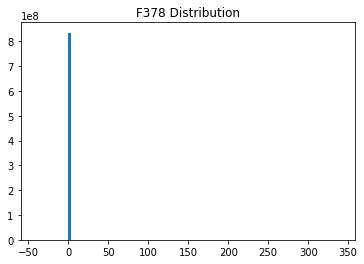

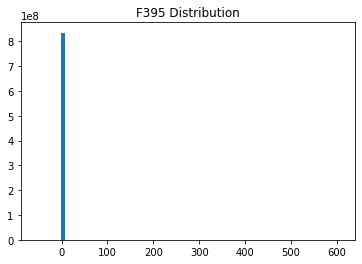

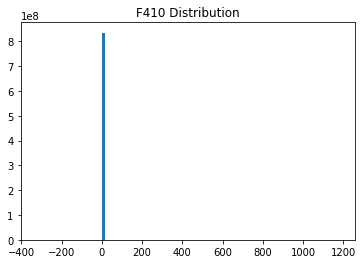

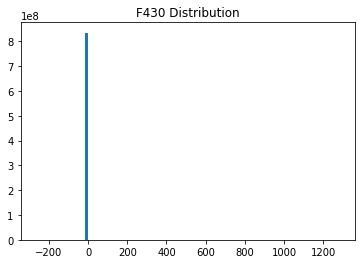

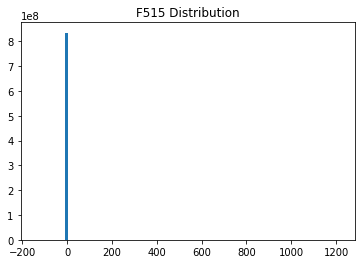

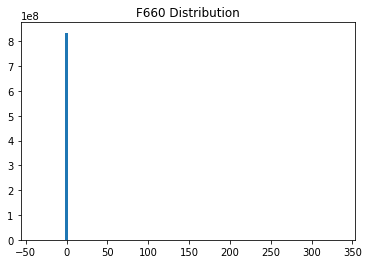

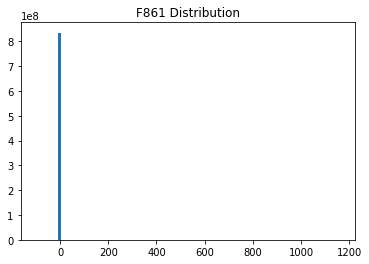

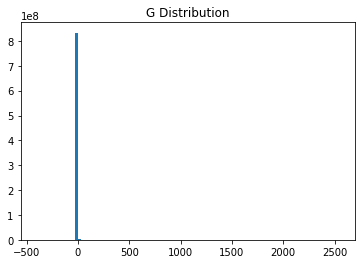

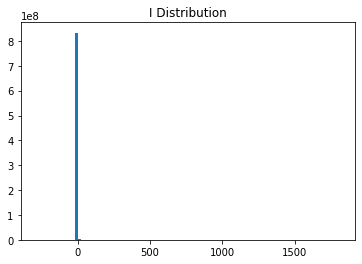

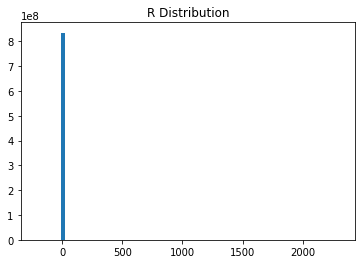

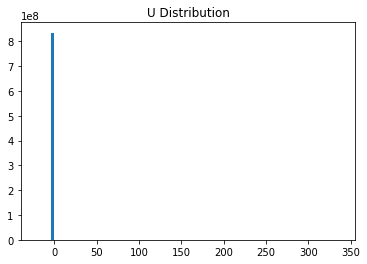

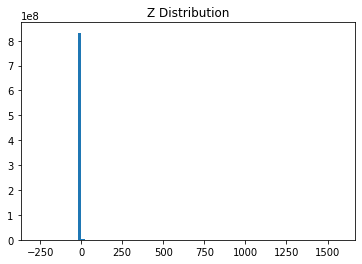

In [273]:
import matplotlib.pyplot as plt

for idx, ch in enumerate(channels):
    ch_max = images[:,:,:,idx].max()
    ch_min = images[:,:,:,idx].min()
    plt.hist(images[:,:,:,idx].ravel(), bins=np.linspace(ch_min, ch_max, 100))
    plt.xlim(ch_min, ch_max)
    plt.title(f"{ch} Distribution")

    plt.show()

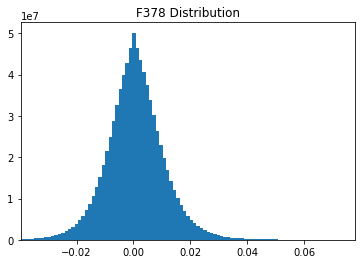

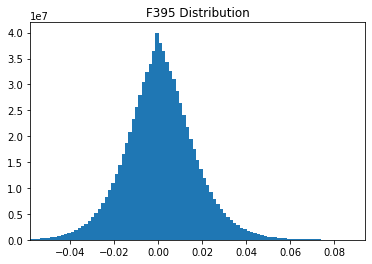

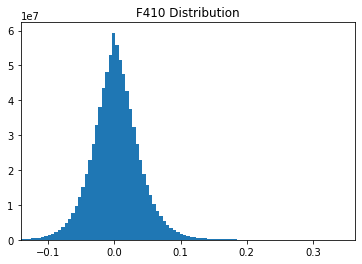

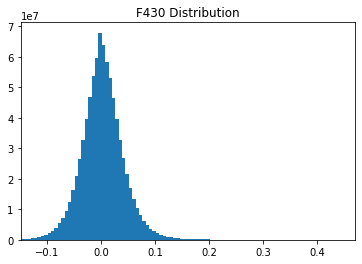

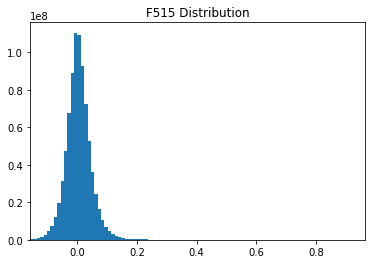

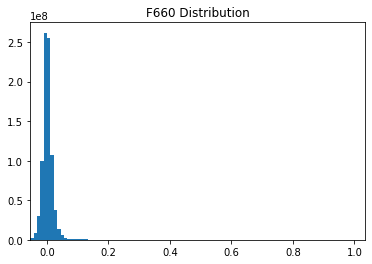

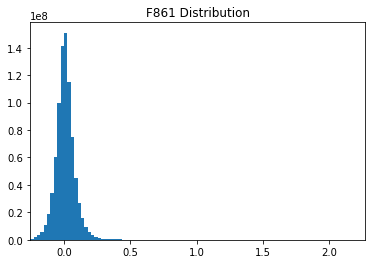

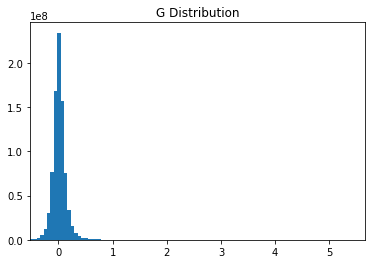

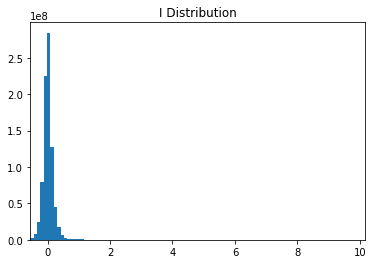

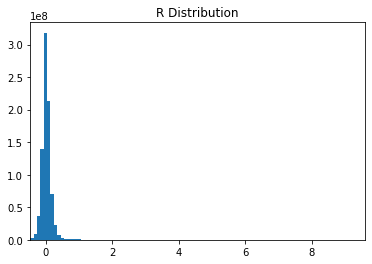

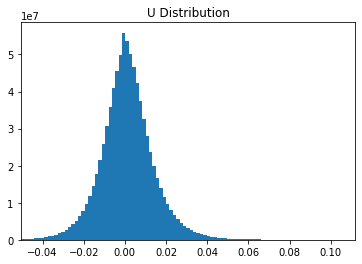

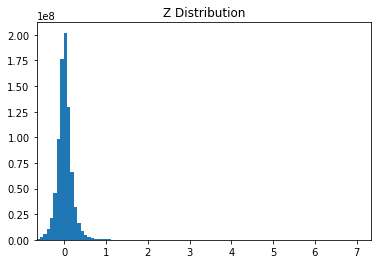

In [274]:
for idx, ch in enumerate(channels):
    ch_max = np.percentile(images[:,:,:,idx], 99.9)
    ch_min = -(np.percentile(-images[:,:,:,idx], 99.9))
    plt.hist(images[:,:,:,idx].ravel(), bins=np.linspace(ch_min, ch_max, 100))
    plt.xlim(ch_min, ch_max)
    plt.title(f"{ch} Distribution")

    plt.show()

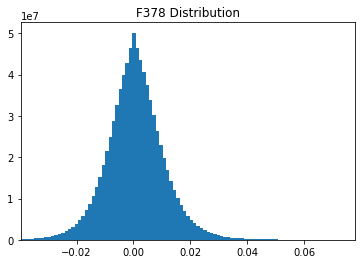

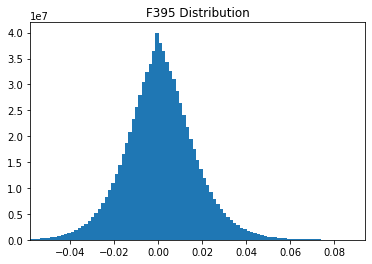

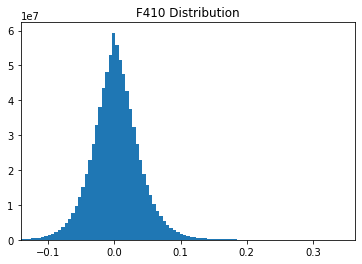

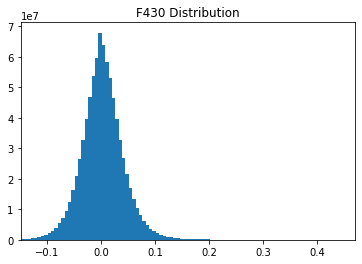

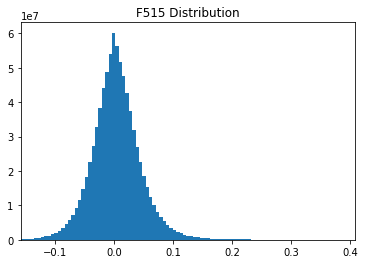

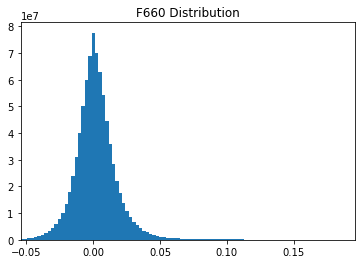

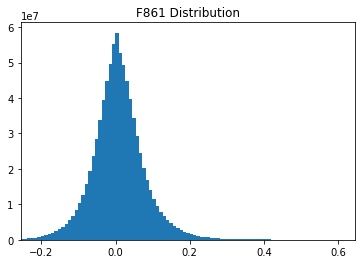

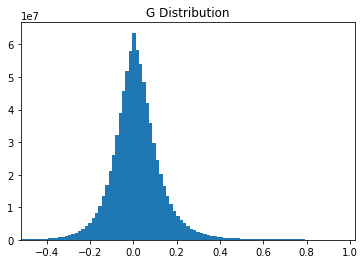

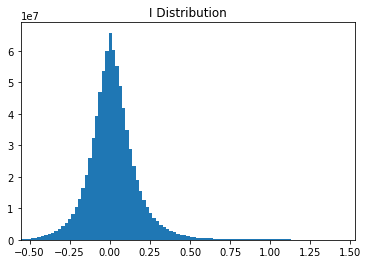

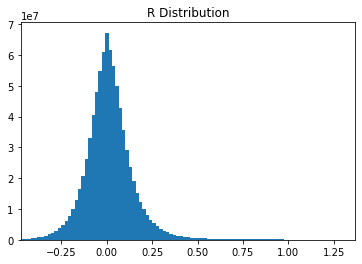

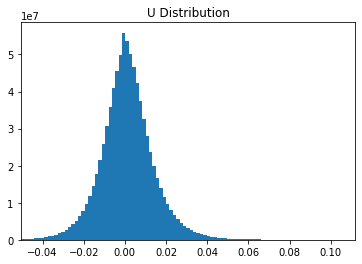

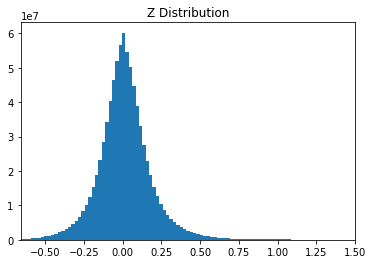

In [278]:
percentile = [99.9, 99.9, 99.9, 99.9, 99.8, 99.6, 99.7, 99.6, 99.5, 99.5, 99.9, 99.6]
for idx, (ch, percent) in enumerate(zip(channels, percentile)):
    ch_max = np.percentile(images[:,:,:,idx], percent)
    ch_min = -(np.percentile(-images[:,:,:,idx], 99.9))
    plt.hist(images[:,:,:,idx].ravel(), bins=np.linspace(ch_min, ch_max, 100))
    plt.xlim(ch_min, ch_max)
    plt.title(f"{ch} Distribution")

    plt.show()

<h1>Normalizing Features</h1>

In [2]:
images = np.load("images.npy")

In [3]:
def MinMaxScaler(array, scale=[0,1]):
    array_max = array.max()
    array_min = array.min()
    return scale[0]+(((array - array_min)*(scale[1] - scale[0]))/(array_max - array_min))

def StandardScaler(array):
    array_mean = array.mean()
    array_std = array.std()
    return (array - array_mean)/(array_std)

In [15]:
channels = ['F378','F395','F410','F430','F515','F660','F861','G','I','R','U','Z']
percentile = [99.9, 99.9, 99.9, 99.9, 99.8, 99.6, 99.7, 99.6, 99.5, 99.5, 99.9, 99.6]


for norm in ["MinMaxStandard", "MinMaxRange", "Standard"]:
    images_normalized = np.zeros(images.shape, dtype="float32")
    for idx, (ch, percent) in enumerate(zip(channels, percentile)):
        ch_max = np.percentile(images[:,:,:,idx], percent)
        ch_min = -(np.percentile(-images[:,:,:,idx], 99.9))
        #Switch images_test for images[:,:,:, idx]
        images[:,:,:, idx] = np.clip(images[:,:,:,idx], ch_min, ch_max)
        if norm == "MinMaxStandard":
            images_normalized[:,:,:, idx] = MinMaxScaler(images[:,:,:, idx], [0,1])
        elif norm == "MinMaxRange":
            images_normalized[:,:,:, idx] = MinMaxScaler(images[:,:,:, idx], [-1,1])
        elif norm == "Standard":
            images_normalized[:,:,:, idx] = StandardScaler(images[:,:,:, idx])
            
        print(f"Norm: {norm:>14} Channel: {ch:>4} Max: {images_normalized[:,:,:, idx].max():.3f} Min: {images_normalized[:,:,:, idx].min():.3f} Mean: {images_normalized[:,:,:, idx].mean():.3f} Std: {images_normalized[:,:,:, idx].std():.3f}")
        
    np.save(f"Images_{norm}.npy", images_normalized)

Norm: MinMaxStandard Channel: F378 Max: 1.000 Min: 0.000 Mean: 0.344 Std: 0.090
Norm: MinMaxStandard Channel: F395 Max: 1.000 Min: 0.000 Mean: 0.389 Std: 0.108
Norm: MinMaxStandard Channel: F410 Max: 1.000 Min: 0.000 Mean: 0.286 Std: 0.077
Norm: MinMaxStandard Channel: F430 Max: 1.000 Min: 0.000 Mean: 0.246 Std: 0.069
Norm: MinMaxStandard Channel: F515 Max: 1.000 Min: 0.000 Mean: 0.288 Std: 0.082
Norm: MinMaxStandard Channel: F660 Max: 1.000 Min: 0.000 Mean: 0.229 Std: 0.085
Norm: MinMaxStandard Channel: F861 Max: 1.000 Min: 0.000 Mean: 0.295 Std: 0.090
Norm: MinMaxStandard Channel:    G Max: 1.000 Min: 0.000 Mean: 0.349 Std: 0.090
Norm: MinMaxStandard Channel:    I Max: 1.000 Min: 0.000 Mean: 0.280 Std: 0.094
Norm: MinMaxStandard Channel:    R Max: 1.000 Min: 0.000 Mean: 0.270 Std: 0.093
Norm: MinMaxStandard Channel:    U Max: 1.000 Min: 0.000 Mean: 0.319 Std: 0.083
Norm: MinMaxStandard Channel:    Z Max: 1.000 Min: 0.000 Mean: 0.315 Std: 0.094
Norm:    MinMaxRange Channel: F378 Max: 

In [16]:
images_normalized.shape

(8157, 320, 320, 12)

<h1>Parallel Stuff</h1>

In [14]:
import concurrent.futures
import time
import multiprocessing

start = time.perf_counter()

channels = ['F378','F395','F410','F430','F515','F660','F861','G','I','R','U','Z']
percentile = [99.9, 99.9, 99.9, 99.9, 99.8, 99.6, 99.7, 99.6, 99.5, 99.5, 99.9, 99.6]

def normalize(idx, norm):
    print(idx)
    ch = channels[idx]
    percent = percentile[idx]
    #print(f"Antes do percentle {idx}")
    ch_max = np.percentile(images[:,:,:,idx], percent)
    #print(f"Meio do percentile {idx}")
    ch_min = -(np.percentile(-images[:,:,:,idx], 99.9))
    #Switch images_test for images[:,:,:, idx]
    #print(f"Antes do Clip {idx}")
    images[:,:,:, idx] = np.clip(images[:,:,:,idx], ch_min, ch_max)
    print(f"Cheguei aqui irmaozinho {idx}")
    if norm == "MinMaxStandard":
        images_normalized[:,:,:, idx] = MinMaxScaler(images[:,:,:, idx], [0,1])
    elif norm == "MinMaxRange":
        images_normalized[:,:,:, idx] = MinMaxScaler(images[:,:,:, idx], [-1,1])
    elif norm == "Standard":
        images_normalized[:,:,:, idx] = StandardScaler(images[:,:,:, idx])

    print(f"Idx: {idx} Norm: {norm:>14} Channel: {ch:>4} Max: {images_normalized[:,:,:, idx].max():.3f} Min: {images_normalized[:,:,:, idx].min():.3f} Mean: {images_normalized[:,:,:, idx].mean():.3f} Std: {images_normalized[:,:,:, idx].std():.3f}")
    
    return f"Finished {idx}"
    
#for norm in ["MinMaxStandard", "MinMaxRange", "Standard"]:
images_normalized = np.zeros(images.shape, dtype="float32")
norm = "MinMaxStandard"

with concurrent.futures.ProcessPoolExecutor(multiprocessing.cpu_count()) as executor:
    results = [executor.submit(normalize, idx, norm) for idx in range(12)]

    print(f"Norm: {norm} | Seguraaaaa")
    concurrent.futures.wait(results)
    print(f"Norm: {norm} | Solta!")
np.save(f"Images_{norm}.npy", images_normalized)
print("Salved")

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

0
11
3
4
1
7
8
5
2
10
6
9
Antes do percentle 3
Antes do percentle 11
Antes do percentle 0
Antes do percentle 8
Antes do percentle 7
Antes do percentle 4
Antes do percentle 9
Antes do percentle 10
Antes do percentle 6
Antes do percentle 1
Antes do percentle 5
Antes do percentle 2
Norm: MinMaxStandard | Seguraaaaa
Meio do percentile 1
Meio do percentile 2
Meio do percentile 3
Meio do percentile 7
Meio do percentile 6
Meio do percentile 10
Meio do percentile 4
Meio do percentile 11
Meio do percentile 0
Meio do percentile 9
Meio do percentile 5
Meio do percentile 8
Antes do Clip 3
Antes do Clip 2
Antes do Clip 1
Antes do Clip 4
Antes do Clip 6


Process ForkProcess-87:
Process ForkProcess-78:
Process ForkProcess-79:
Process ForkProcess-80:
Process ForkProcess-88:
Process ForkProcess-84:
Process ForkProcess-95:
Process ForkProcess-93:
Process ForkProcess-89:
Process ForkProcess-85:
Process ForkProcess-82:
Process ForkProcess-96:
Process ForkProcess-92:
Process ForkProcess-94:
Process ForkProcess-77:
Process ForkProcess-90:
Process ForkProcess-86:
Process ForkProcess-91:
Process ForkProcess-81:
Process ForkProcess-83:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call la

KeyboardInterrupt: 